<a href="https://colab.research.google.com/github/putribuana/RadikalTes-NaiveBayes/blob/main/Naive_Bayes_Radical_Analysis_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library Needed

>



In [ ]:
from pprint import pprint
import pandas as pd
import numpy as np
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
# preprocessing library
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#Data Gathering

In [ ]:
dataset_path = "./data-pute1.csv"

dataset = pd.read_csv(dataset_path, dtype={'Kalimat':'string', 'Label':'string'})
dataset.head(5)

,Kalimat,Label
0,wahai perintah dukung cukup tidak beri ruang p...,1
1,demokrasi bikin masyarakat sejahtera justru de...,1
2,mau vaksin arti kadrun anti pancasila radikal ...,1
3,erick thohir dapat informasi aji batal erick t...,1
4,aparat terlalu lembek sepakat tindak siapa jug...,1


In [ ]:
feature = dataset['Kalimat'].to_numpy()
target = dataset['Label'].to_numpy()

#Assesing Data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Kalimat  834 non-null    string
 1   Label    834 non-null    string
dtypes: string(2)
memory usage: 13.2 KB


In [ ]:
#cek missing value
dataset.isna().sum()

Kalimat    0
Label      0
dtype: int64

In [ ]:
dataset.describe()

,Kalimat,Label
count,834,834
unique,830,2
top,islam indah,1
freq,2,447


1    447
0    387
Name: Label, dtype: Int64


<Axes: >

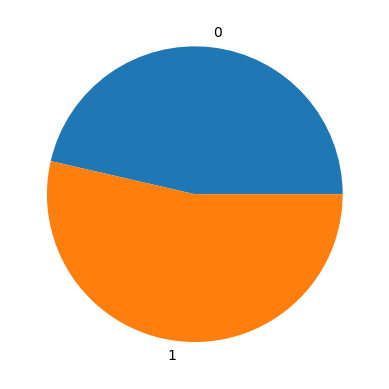

In [ ]:
#jumlah kelas cenderung radikal(1) / tidak radikal (0)

print(dataset['Label'].value_counts())
dataset.groupby('Label').size().plot(kind='pie')

#Text Preprocessing

In [ ]:
# filtering (case folding, remove punctuation, remove number)
filter_feature = [re.sub('[^A-Za-z]+', ' ', text).strip().lower() for text in feature]
pprint(filter_feature[:5])

['wahai perintah dukung cukup tidak beri ruang para benalu pancasila nkri',
 'demokrasi bikin masyarakat sejahtera justru demokrasi konflik makin banyak '
 'jadi masyarakat amerika baru tahun an memang benar terap demokrasi belum '
 'terap politik apartheid',
 'mau vaksin arti kadrun anti pancasila radikal radikal intoleransi tidak '
 'nasionalis pindah yaman silah tambah sendiri',
 'erick thohir dapat informasi aji batal erick thohir segera ubah reformasi '
 'pln ini bukan ancam biasa ini ancam serius lihat rekam jejak felix siauw ini '
 'sosok asong negara anti pancasila',
 'aparat terlalu lembek sepakat tindak siapa juga menu ulama nggu denny '
 'siregar ade armando abu janda gerombol tukang sebar hoax fitnah tindak '
 'gerombol anti nkri anti pancasila']


In [ ]:
# stop word removing
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
removed_stopwords = [stopword.remove(text) for text in filter_feature]
pprint(removed_stopwords[:5])

['wahai perintah dukung cukup beri ruang benalu pancasila nkri',
 'demokrasi bikin masyarakat sejahtera justru demokrasi konflik makin banyak '
 'jadi masyarakat amerika baru tahun an memang benar terap demokrasi terap '
 'politik apartheid',
 'mau vaksin arti kadrun anti pancasila radikal radikal intoleransi nasionalis '
 'pindah yaman silah tambah sendiri',
 'erick thohir informasi aji batal erick thohir segera ubah reformasi pln '
 'bukan ancam biasa ancam serius lihat rekam jejak felix siauw sosok asong '
 'negara anti pancasila',
 'aparat terlalu lembek sepakat tindak siapa menu ulama nggu denny siregar ade '
 'armando abu janda gerombol tukang sebar hoax fitnah tindak gerombol anti '
 'nkri anti pancasila']


In [ ]:
# stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stemmed  = [stemmer.stem(text) for text in removed_stopwords]
pprint(stemmed[:5])

['wahai perintah dukung cukup beri ruang benalu pancasila nkri',
 'demokrasi bikin masyarakat sejahtera justru demokrasi konflik makin banyak '
 'jadi masyarakat amerika baru tahun an memang benar terap demokrasi terap '
 'politik apartheid',
 'mau vaksin arti kadrun anti pancasila radikal radikal intoleransi nasionalis '
 'pindah yaman silah tambah sendiri',
 'erick thohir informasi aji batal erick thohir segera ubah reformasi pln '
 'bukan ancam biasa ancam serius lihat rekam jejak felix siauw sosok asong '
 'negara anti pancasila',
 'aparat terlalu lembek sepakat tindak siapa menu ulama nggu denny siregar ade '
 'armando abu janda gerombol tukang sebar hoax fitnah tindak gerombol anti '
 'nkri anti pancasila']


In [ ]:
clean_df = pd.DataFrame(stemmed)
clean_df.head(5)

,0
0,wahai perintah dukung cukup beri ruang benalu ...
1,demokrasi bikin masyarakat sejahtera justru de...
2,mau vaksin arti kadrun anti pancasila radikal ...
3,erick thohir informasi aji batal erick thohir ...
4,aparat terlalu lembek sepakat tindak siapa men...


(array([ 7., 18., 25., 24., 27., 22., 19., 26., 15., 18., 29., 20., 18.,
        18., 23., 27., 20., 28., 22., 19., 27., 24., 22., 19., 21., 15.,
        32., 19., 18., 26., 23., 22., 22., 23., 28., 19., 15.,  8.,  1.,
         7.,  8.,  3.,  1.,  1.,  0.,  2.,  1.,  0.,  1.,  1.]),
 array([  3.  ,   8.64,  14.28,  19.92,  25.56,  31.2 ,  36.84,  42.48,
         48.12,  53.76,  59.4 ,  65.04,  70.68,  76.32,  81.96,  87.6 ,
         93.24,  98.88, 104.52, 110.16, 115.8 , 121.44, 127.08, 132.72,
        138.36, 144.  , 149.64, 155.28, 160.92, 166.56, 172.2 , 177.84,
        183.48, 189.12, 194.76, 200.4 , 206.04, 211.68, 217.32, 222.96,
        228.6 , 234.24, 239.88, 245.52, 251.16, 256.8 , 262.44, 268.08,
        273.72, 279.36, 285.  ]),
 <BarContainer object of 50 artists>)

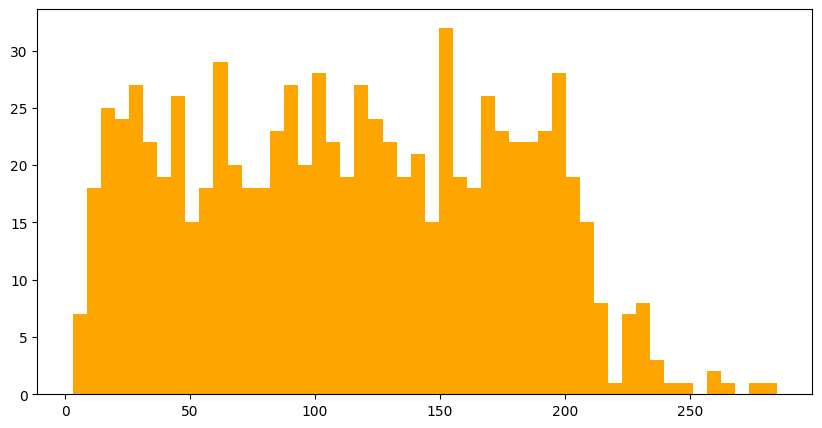

In [ ]:
#melihat panjang text
text_length = clean_df[0].str.len()
plt.figure(figsize=(10, 5))
plt.hist(text_length, bins=50, label='Panjang Data Teks', color='orange')

(-0.5, 799.5, 499.5, -0.5)

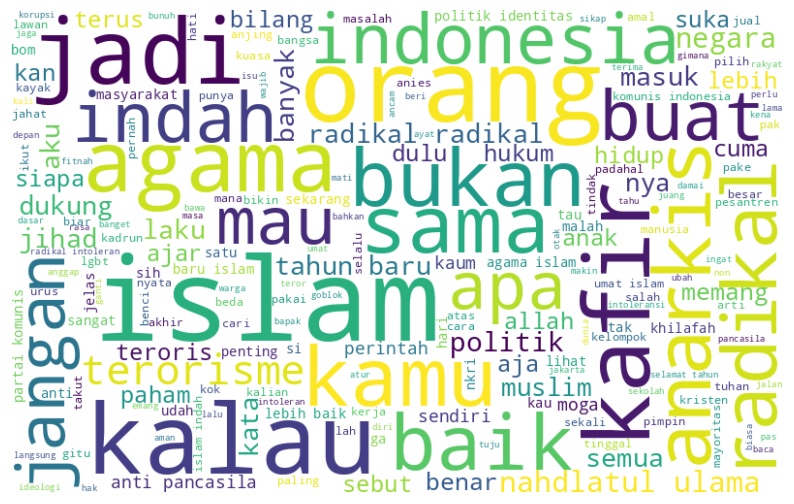

In [ ]:
# word cloud

words = ' '.join([text for text in clean_df[0]])
wordcloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


#Data Preprocessing

In [ ]:
# bagi data latih dan data uji
x_train, x_val, y_train, y_val = train_test_split(clean_df[0], target, test_size=0.2, shuffle=True, random_state=145)

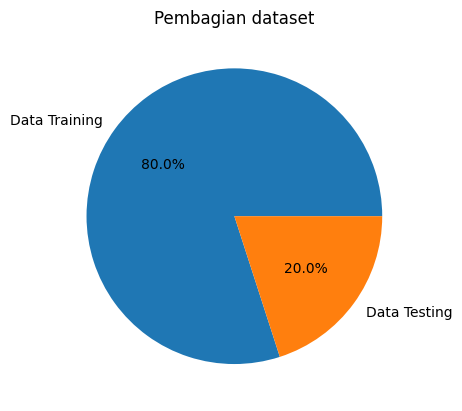

In [ ]:
# visualisasi data split
labels = ['Data Training', 'Data Testing']
sizes = [len(x_train), len(x_val)]

plt.Figure(figsize=(2,2))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pembagian dataset')
plt.show()

In [ ]:
# vektorisasi text

vectorizer = TfidfVectorizer(min_df=5,
                             max_df=0.8,
                             sublinear_tf=True,
                             use_idf=True)

train_vectors = vectorizer.fit_transform(x_train)
val_vectors = vectorizer.transform(x_val)

#Modelling

In [ ]:
# klasifikasi naive bayes dengan sklearn Bernoulli
clf = BernoulliNB(force_alpha=True)

clf.fit(train_vectors, y_train)
prediction = clf.predict(val_vectors)

In [ ]:
# menghitung akurasi
accuracy = accuracy_score(y_val, prediction)
print("Accuracy:", accuracy)

Accuracy: 0.718562874251497


In [ ]:
# confusion matriks
confusion_matrix(y_val, prediction)

array([[56, 23],
       [24, 64]])

In [ ]:
# matriks
target_names = ['radical', 'not radical']
print(classification_report(y_val, prediction, target_names=target_names))

              precision    recall  f1-score   support

     radical       0.70      0.71      0.70        79
 not radical       0.74      0.73      0.73        88

    accuracy                           0.72       167
   macro avg       0.72      0.72      0.72       167
weighted avg       0.72      0.72      0.72       167



#Save Model

In [ ]:
#save model
from google.colab import files

model_name = 'model.joblib'
vectorizer_name = 'vectorizer.joblib'

joblib.dump(clf, model_name)
joblib.dump(vectorizer, vectorizer_name)

files.download(model_name)
files.download(vectorizer_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Testing

In [ ]:
# load model dan vectorizer
test_model = joblib.load(model_name)
test_vectorizer = joblib.load(vectorizer_name)

In [ ]:
kalimat = input()
sentence_vectorizer = test_vectorizer.transform([kalimat])

predict = test_model.predict(sentence_vectorizer)
result = 'Cenderung Radikal' if(predict[0] == 1) else 'Tidak Radikal'
print('Hasil Prediksi :', result)

anarkis banget jadi orang
Hasil Prediksi : Tidak Radikal
